## Dependencias

In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE,MDS

from sklearn.impute import SimpleImputer

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from varclushi import VarClusHi

from scipy import stats

cf.go_offline()
pd.set_option('display.max_columns', None)

## Datos

In [4]:
ruta = '/media/jose/090f6b94-de30-4aaf-9f8a-4e18b120d7f6/bd/01. Simples/pure_ml/train.csv'

In [5]:
df = pd.read_csv(ruta)
print(df.shape)
df.head()

(9294, 55)


,ID,C_01,C_02,C_03,C_04,C_05,C_06,C_07,C_08,C_09,...,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,D_1,TARGET
0,674,41.902848,-87.643360,41.901540,-87.648066,41.901002,-87.642246,41.901952,-87.649264,41.900381,...,1114,607.755835,18.2125,0.442469,12.577837,0.089440,0.385996,0.013465,cat11,0.0
1,7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,981,800.978593,514.1375,0.429966,16.390591,0.069741,0.174312,0.260958,cat01,0.0
2,11558,41.891421,-87.641041,41.897380,-87.651233,41.892190,-87.645894,41.898590,-87.651771,41.892631,...,706,699.008499,231.2625,0.357551,12.856969,0.094956,0.100567,0.055241,cat01,0.0
3,463,41.894619,-87.664955,41.896899,-87.657375,41.899288,-87.667246,41.897670,-87.658840,41.900640,...,947,633.389652,391.8000,0.334950,14.844393,0.087593,0.271383,0.155227,cat04,0.0
4,2409,41.896174,-87.649482,41.896501,-87.647639,41.895677,-87.646345,41.896954,-87.644895,41.896052,...,917,714.956332,80.7750,0.454336,12.954656,0.077860,0.149400,0.030534,cat07,0.0


## Análisis Exploratorio de Datos

### Categorización de variables

In [6]:
varc = list(df.filter(like='C_').columns)
varc[:5],len(varc)

(['C_01', 'C_02', 'C_03', 'C_04', 'C_05'], 52)

### Ausentes

In [17]:
miss = (df[varc].isnull().sum()/len(df)).to_frame()
miss.columns = ['pct_miss']
fuera = list(miss[miss['pct_miss']>0.3].index)
varc = [v for v in varc if v not in fuera]
df.drop(fuera,axis=1,inplace=True)
df.head()

,ID,C_17,C_18,C_19,C_20,C_22,C_23,C_24,C_25,C_26,C_27,C_28,C_29,C_31,C_32,C_33,C_34,C_35,C_36,C_37,C_38,C_39,C_40,C_41,C_42,C_43,C_44,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,D_1,TARGET
0,674,279.80,253.0,636.521739,17.20,12.512055,0.076062,0.458498,0.003953,592.67,524.0,637.442748,18.300,12.815210,0.079497,0.446565,0.007634,985.08,803.0,613.524284,17.633333,0.464201,12.550535,0.089379,0.405978,0.011208,1416.46,1114,607.755835,18.2125,0.442469,12.577837,0.089440,0.385996,0.013465,cat11,0.0
1,7397,424.60,261.0,964.137931,492.35,15.684291,0.079347,0.160920,0.287356,790.93,493.0,862.393509,484.900,16.119533,0.076833,0.194726,0.253550,1095.13,724.0,819.861878,489.266667,0.425767,16.177320,0.069578,0.185083,0.256906,1504.42,981,800.978593,514.1375,0.429966,16.390591,0.069741,0.174312,0.260958,cat01,0.0
2,11558,217.58,124.0,690.000000,167.55,12.970403,0.107815,0.048387,0.032258,498.69,296.0,710.067568,218.375,13.783581,0.098429,0.104730,0.013514,839.38,517.0,704.448743,242.733333,0.326990,13.455764,0.097792,0.104449,0.025145,1065.77,706,699.008499,231.2625,0.357551,12.856969,0.094956,0.100567,0.055241,cat01,0.0
3,463,276.03,190.0,653.368421,302.00,15.971474,0.078138,0.100000,0.147368,656.13,426.0,667.464789,367.425,16.020376,0.086355,0.230047,0.159624,1017.63,668.0,656.047904,392.600000,0.323264,15.576991,0.086988,0.248503,0.184132,1385.09,947,633.389652,391.8000,0.334950,14.844393,0.087593,0.271383,0.155227,cat04,0.0
4,2409,257.86,236.0,706.779661,277.75,12.612754,0.076502,0.144068,0.059322,548.68,482.0,718.128898,145.650,12.402863,0.081410,0.161826,0.045643,814.62,697.0,715.000000,102.666667,0.451432,12.958924,0.077184,0.164993,0.034433,1067.92,917,714.956332,80.7750,0.454336,12.954656,0.077860,0.149400,0.030534,cat07,0.0


In [21]:
im = SimpleImputer(strategy='median')
im.fit(df[varc])

SimpleImputer(strategy='median')

In [22]:
Xi = pd.DataFrame(im.transform(df[varc]),columns=varc)

In [23]:
Xi.dropna().shape,Xi.shape

((9294, 34), (9294, 34))

In [31]:
ks = pd.DataFrame(map(lambda v:(v,stats.ks_2samp(Xi[v],df[v].dropna()).statistic),varc),columns=['var','ks']).sort_values('ks',ascending=False)
fuera = ks[ks['ks']>0.1]['var'].tolist()
varc = [v for v in varc if v not in fuera]
df.drop(fuera,axis=1,inplace=True)

In [32]:
len(varc)

32

### Multicolinealidad

In [40]:
vc = VarClusHi(df = Xi[varc],feat_list=varc).varclus()
mc = vc.rsquare.sort_values('RS_Ratio').groupby('Cluster').first()['Variable'].tolist()

In [41]:
mc

['C_36', 'C_41', 'C_40', 'C_43', 'C_42', 'C_29', 'C_19']

### Extremos

array([[<Axes: title={'center': 'C_36'}>,
        <Axes: title={'center': 'C_41'}>,
        <Axes: title={'center': 'C_40'}>],
       [<Axes: title={'center': 'C_43'}>,
        <Axes: title={'center': 'C_42'}>,
        <Axes: title={'center': 'C_29'}>],
       [<Axes: title={'center': 'C_19'}>, <Axes: >, <Axes: >]],
      dtype=object)

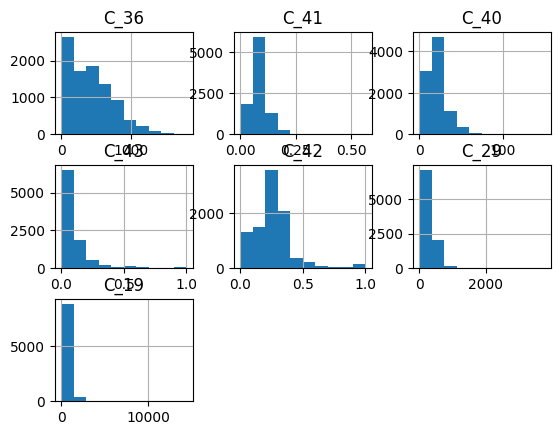

In [53]:
Xi[mc].hist()

In [50]:
for v,li,ls in Xi[mc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    Xi[f'ex_{v}'] = ((Xi[v]<li)|(Xi[v]>ls)).astype(int)
Xi['ex_'] = Xi.filter(like='ex_').max(axis=1)


In [52]:
Xi['ex_'].value_counts(1)

ex_
0    0.939961
1    0.060039
Name: proportion, dtype: float64

In [54]:
Xi = Xi[Xi['ex_']==0].reset_index(drop=True).drop(Xi.filter(like='ex_'),axis=1)

array([[<Axes: title={'center': 'C_36'}>,
        <Axes: title={'center': 'C_41'}>,
        <Axes: title={'center': 'C_40'}>],
       [<Axes: title={'center': 'C_43'}>,
        <Axes: title={'center': 'C_42'}>,
        <Axes: title={'center': 'C_29'}>],
       [<Axes: title={'center': 'C_19'}>, <Axes: >, <Axes: >]],
      dtype=object)

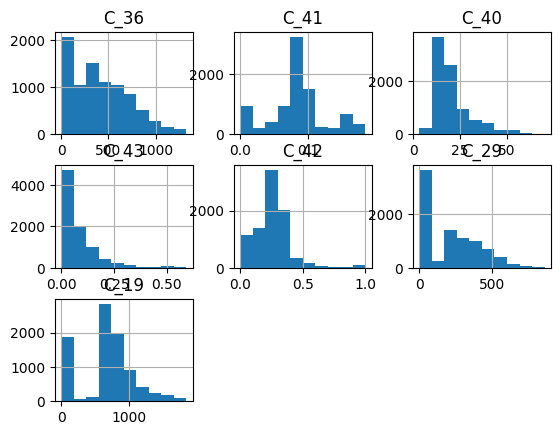

In [56]:
Xi[mc].hist()

## Reducción de dimensiones

### PCA

In [ ]:
sc = StandardScaler()
pca = PCA(n_components=3)
Xp = pd.DataFrame(pca.fit_transform(sc.fit_transform(X)),columns=['d1','d2','d3'])
print(pca.explained_variance_ratio_.cumsum())

[0.72962445 0.95813207 0.99482129]


### MDS

In [ ]:
sc = MinMaxScaler()
mds = MDS(n_components=3,n_jobs=-1)
Xm = pd.DataFrame(mds.fit_transform(sc.fit_transform(X)),columns=['d1','d2','d3'])


/home/jose/entornos/tse/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



### t-SNE

In [ ]:
tsne = TSNE(n_components=3,n_jobs=-1)
Xt = pd.DataFrame(tsne.fit_transform(X),columns=['d1','d2','d3'])

## Visualización

In [ ]:
Xp['target'] = Xt['target'] = Xm['target'] = Sn['target']

In [ ]:
Xp.iplot(kind='scatter3d',x='d1',y='d2',z='d3',categories='target',size=5,title='PCA')
Xm.iplot(kind='scatter3d',x='d1',y='d2',z='d3',categories='target',size=5,title='MDS')
Xt.iplot(kind='scatter3d',x='d1',y='d2',z='d3',categories='target',size=5,title='TSNE')